# Data Loading and Initial Exploration


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier




- Reading Data: The dataset is loaded from a CSV file.
- Basic Information: Prints the dataset's information, including data types and non-null counts, to identify the need for data cleaning.
- Descriptive Statistics: Generates statistics that summarize the central tendency, dispersion, and shape of the dataset's distributions.
- Missing Values: Checks and prints the count of missing values in each column.

In [2]:
#Read the Dataset
df = pd.read_csv('../datasets/PCOS_data.csv')
df.head()

# Display basic information and the first few rows
print(df.info())
display(df.head())

# Generate descriptive statistics
display(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3           15                78                22  ...             0   
1  24.9           15                74                20  ...             0   
2  25.3           11                72                18  ...             1   
3  29.7           13                72                20  ...             0   
4  20.1           11                72                18  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 18.0                  18.0               8.5  
1                 15.0                  14.0               3.7  
2                 18.0                  20.0              10.0  
3                 15.0                  14.0               7.5  
4                 16.0                  14.0               7.0  

[5 rows x 44 columns]

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.307579    13.802218         73.247689   
std       6.033545    4.055129     1.840812          4.430285   
min     137.000000   12.400000    11.000000         13.000000   
25%     152.000000   21.600000    13.000000         72.000000   
50%     156.000000   24.200000    14.000000         72.000000   
75%     160.000000   26.600000    15.000000         74.000000   
max     180.000000   38.900000    18.000000         82.000000   

       RR (breaths/min)  ...  Pimples(Y/N)  Fast food (Y/N)  \
count        541.000000  ...    541.000000       540.000000   
mean          19.243993  ...      0.489834         0.514815   
std            1.688629  ...      0.500359         0.500244   
min           16.000000  ...      0.000000         0.000000   
25%           18.000000  ...      0.000000         0.000000   
50%           18.000000  ...      0.000000         1.000000   
75%           20.000000  ...      1.000000         1.000000   
max           28.000000  ...      1.000000         1.000000   

       Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  \
count         541.000000           541.000000            541.000000   
mean            0.247689           114.661738             76.927911   
std             0.432070             7.384556              5.574112   
min             0.000000            12.000000              8.000000   
25%             0.000000           110.000000             70.000000   
50%             0.000000           110.000000             80.000000   
75%             0.000000           120.000000             80.000000   
max             1.000000           140.000000            100.000000   

       Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
count        541.000000        541.000000            541.000000   
mean           6.129390          6.641405             15.018115   
std            4.229294          4.436889              3.566839   
min            0.000000          0.000000              0.000000   
25%            3.000000          3.000000             13.000000   
50%            5.000000          6.000000             15.000000   
75%            9.000000         10.000000             18.000000   
max           22.000000         20.000000             24.000000   

       Avg. F size (R) (mm)  Endometrium (mm)  
count            541.000000        541.000000  
mean              15.451701          8.475915  
std                3.318848          2.165381  
min                0.000000          0.000000  
25%               13.000000          7.000000  
50%               16.000000          8.500000  
75%               18.000000          9.800000  
max               24.000000         18.000000  

[8 rows x 42 columns]

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

# Data Cleaning and Preparation


- Normalize Column Names: Standardizes column names by replacing spaces with underscores and removing extra spaces.
- Handling Numeric Columns: Converts numeric columns to a float type, handling non-numeric entries and filling missing values with the median.
- Handling Categorical Columns: Fills missing values in categorical columns with the most frequent value (mode) and encodes them numerically.
- Standardization: Applies standard scaling to numeric columns to normalize their ranges.

In [3]:
# 5. Normalize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns.tolist())

['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)', 'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)', 'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)', 'Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_abortions', 'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio', 'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)', 'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 'BP__Systolic_(mmHg)', 'BP__Diastolic_(mmHg)', 'Follicle_No._(L)', 'Follicle_No._(R)', 'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)']


In [4]:
# Correctly handle numeric columns with special characters and potential non-numeric data
numeric_columns = ['BMI', 'Age_(yrs)', 'Weight_(Kg)', 'Waist:Hip_Ratio', 
                   'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 
                   'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)', 
                   'Cycle_length(days)', 'Endometrium_(mm)', 
                   'BP__Systolic_(mmHg)', 'BP__Diastolic_(mmHg)']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace(r'^\.+$', '', regex=True), errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns and fill missing values with mode
categorical_columns = ['PCOS_(Y/N)', 'Pregnant(Y/N)', 'Weight_gain(Y/N)', 
                       'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 
                       'Hair_loss(Y/N)', 'Pimples(Y/N)', 
                       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 
                       'Blood_Group']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
# Encode categorical variables using LabelEncoder
labelencoder = LabelEncoder()
for column in categorical_columns:
    df[column] = labelencoder.fit_transform(df[column])

# Normalize or standardize numerical columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Statistical Analysis and Visualization


- Grouped Statistics: Provides descriptive statistics of cycle length days grouped by PCOS status to explore differences.
- Visualization: Uses a boxplot to visually represent the distribution of cycle lengths across different PCOS statuses, highlighting outliers and spread.

            count      mean       std       min       25%       50%       75%  \
PCOS_(Y/N)                                                                      
0           364.0  0.124459  0.848121 -3.314582  0.039681  0.039681  0.710533   
1           177.0 -0.255949  1.221626 -1.972877 -1.302024  0.039681  0.039681   

                 max  
PCOS_(Y/N)            
0           4.735648  
1           4.735648  


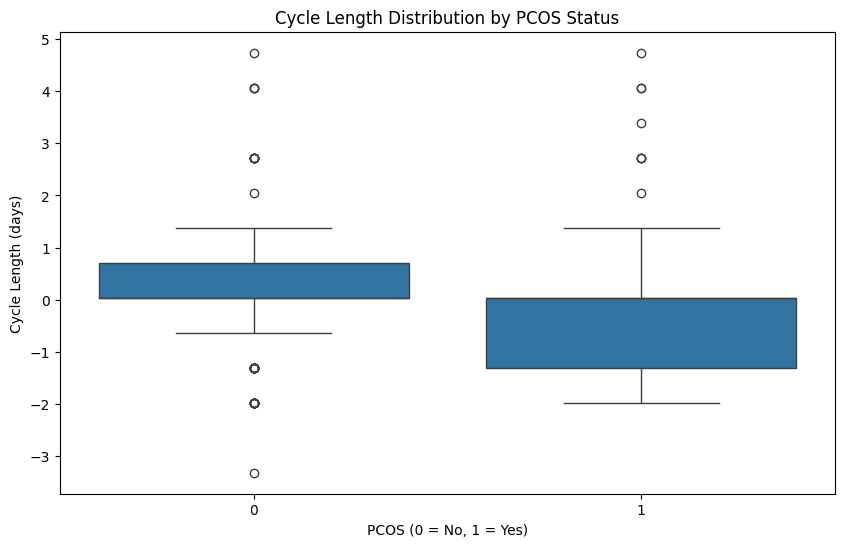

In [6]:
# Statistical summary of 'Cycle_length(days)' grouped by 'PCOS_(Y/N)'
grouped_cycle = df.groupby('PCOS_(Y/N)')['Cycle_length(days)'].describe()
print(grouped_cycle)

# Boxplot to visualize the distribution of 'Cycle_length(days)' for each PCOS category
plt.figure(figsize=(10, 6))
sns.boxplot(x='PCOS_(Y/N)', y='Cycle_length(days)', data=df)
plt.title('Cycle Length Distribution by PCOS Status')
plt.xlabel('PCOS (0 = No, 1 = Yes)')
plt.ylabel('Cycle Length (days)')
plt.show()


# Model Training


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [9]:
# Prepare data
X = df.drop('PCOS_(Y/N)', axis=1)
y = df['PCOS_(Y/N)']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Impute missing values and standardize features
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Create a pipeline that first imputes the data then scales it
pipeline = make_pipeline(imputer, scaler)

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [12]:
# Initialize classifiers
classifiers = {
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree (gini)': DecisionTreeClassifier(criterion='gini'),
    'Decision Tree (entropy)': DecisionTreeClassifier(criterion='entropy'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Dummy Classifier': DummyClassifier(strategy='most_frequent'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

In [13]:
import warnings
warnings.filterwarnings('ignore')


In [14]:
# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_transformed, y_train)
    y_pred = clf.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = (accuracy, roc_auc)
    print(f'{name} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}')

KNN (k=3) - Accuracy: 0.8532, ROC-AUC: 0.7774
KNN (k=5) - Accuracy: 0.8349, ROC-AUC: 0.7461
Decision Tree (gini) - Accuracy: 0.8349, ROC-AUC: 0.8192
Decision Tree (entropy) - Accuracy: 0.8165, ROC-AUC: 0.8062
Random Forest - Accuracy: 0.8716, ROC-AUC: 0.8178
Naive Bayes - Accuracy: 0.7706, ROC-AUC: 0.7920
Dummy Classifier - Accuracy: 0.7064, ROC-AUC: 0.5000
XGBoost - Accuracy: 0.8349, ROC-AUC: 0.8009
[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

#  Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [17]:
classifiers = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_transformed, y_train, cv=5)
    results[name] = scores.mean()
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f}")

KNN Cross-Validation Accuracy: 0.8796
Decision Tree Cross-Validation Accuracy: 0.8009
Random Forest Cross-Validation Accuracy: 0.9074
XGBoost Cross-Validation Accuracy: 0.8841
[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336232 -> initscore=-0.680132
[LightGBM] [Info] Start training from score -0.680132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

# Hyperparameter Tuning

Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each classifier
param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 62]},
    'CatBoost': {'iterations': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'depth': [4, 6, 8]}
}

# Initialize grid search for each classifier
for name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid[name], cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train_transformed, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f'Best Params for {name}: {best_params}')
    print(f'Best Cross-Validation Score for {name}: {best_score:.4f}')


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params for KNN: {'n_neighbors': 7}
Best Cross-Validation Score for KNN: 0.8912
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 30}
Best Cross-Validation Score for Decision Tree: 0.8217
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params for Random Forest: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.9143
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best Cross-Validation Score for XGBoost: 0.8981
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [21]:
print(f'Best Params for {name}: {best_params}')
print(f'Best Cross-Validation Score for {name}: {best_score:.4f}')

Best Params for CatBoost: {'depth': 4, 'iterations': 100, 'learning_rate': 0.1}
Best Cross-Validation Score for CatBoost: 0.9166


Random Search

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define parameter distributions for each classifier
param_dist = {
    'KNN': {'n_neighbors': randint(1, 20)},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': randint(10, 300), 'max_depth': [None, 10, 20, 30]},
    'XGBoost': {'n_estimators': randint(50, 300), 'learning_rate': uniform(0.01, 0.2), 'max_depth': randint(3, 10)},
    'LightGBM': {'n_estimators': randint(50, 300), 'learning_rate': uniform(0.01, 0.2), 'num_leaves': randint(20, 100)},
    'CatBoost': {'iterations': randint(10, 300), 'learning_rate': uniform(0.01, 0.2), 'depth': randint(3, 10)}
}

# Initialize random search for each classifier
for name, clf in classifiers.items():
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist[name], n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)
    random_search.fit(X_train_transformed, y_train)
    best_params = random_search.best_params_
    best_score = random_search.best_score_
    print(f'Best Params for {name}: {best_params}')
    print(f'Best Cross-Validation Score for {name}: {best_score:.4f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params for KNN: {'n_neighbors': 7}
Best Cross-Validation Score for KNN: 0.8912
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params for Decision Tree: {'max_depth': 20, 'criterion': 'entropy'}
Best Cross-Validation Score for Decision Tree: 0.8170
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params for Random Forest: {'max_depth': 30, 'n_estimators': 188}
Best Cross-Validation Score for Random Forest: 0.9189
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params for XGBoost: {'learning_rate': 0.18609356780305156, 'max_depth': 4, 'n_estimators': 94}
Best Cross-Validation Score for XGBoost: 0.9073
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` 

In [24]:
print(f'Best Cross-Validation Score for {name}: {best_score:.4f}')


Best Cross-Validation Score for CatBoost: 0.9189
